## Introduction to Feature Engineering

    
    "Everything that can be counted does not necessarily count; everything that counts cannot necessarily be counted." -Albert Einstein

### What is feature engineering?

* Feature engineering is manually designing what the input X should be
* The process of using domain knowledge of the data to create features that make machine learning algorithms work


### Why do we need feature engineering?

* Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
* Improving the performance of machine learning models.

    - You can isolate and highlight key information, which helps your algorithms "focus" on what’s important.
    - You can bring in your own domain expertise.
    - Most importantly, once you understand the "vocabulary" of feature engineering, you can bring in other people’s domain expertise!

### Where do data scientists spend their time on?

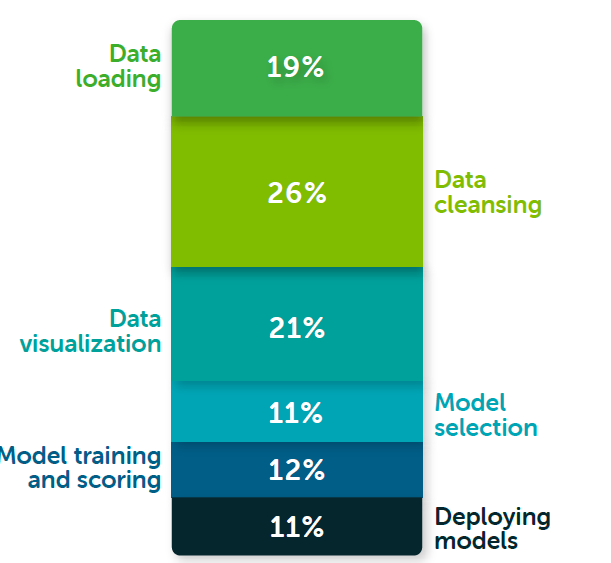

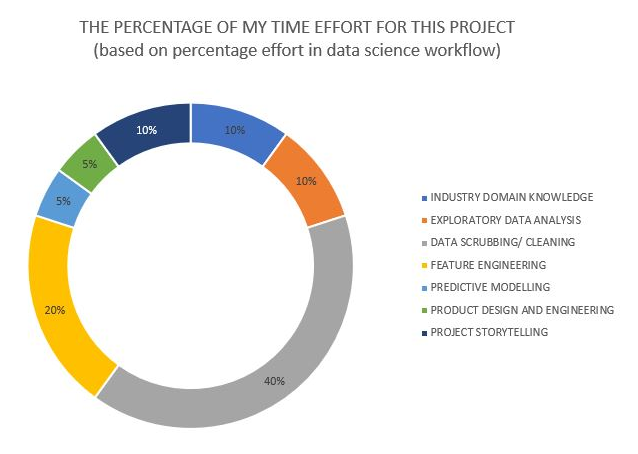

### Topics
   1. Handling missing data - imputation and filtering
   2. Handling Outliers
   3. Handling noisy data 
   4. Binning
   5. Log Transform
   6. One-Hot Encoding
   7. Aggregations / Group Statistics
   8. Combining / Splitting
   9. Scaling
   10. Extracting Date

### 1. Handling missing data

* Missing data is very common in data preparation. 
* Missing data comes from many reasons such as data availability, human errors, interruptions in the data flow, privacy concerns, and so on.
* Math is usually bad at handling the unexpected missing value.
* So missing values affect the performance of the machine learning models.

#### It is our job to prepare the data well for the machine learning models.

* Don't break the models
* Hope to have better performance

#### The simplest but not the best solution is to drop the rows or the columns where there are too many missing values.

<font color='red'>Warning: Some values may be a very good predictor, so you need to check them before you drop the entire column.</font>

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'date': pd.date_range(start='2020-01-01', periods=12, freq='D'), 
                   'price': [43,45,44,45,46,47,49,48,50,54,53,55]})
print(df)

         date  price
0  2020-01-01     43
1  2020-01-02     45
2  2020-01-03     44
3  2020-01-04     45
4  2020-01-05     46
5  2020-01-06     47
6  2020-01-07     49
7  2020-01-08     48
8  2020-01-09     50
9  2020-01-10     54
10 2020-01-11     53
11 2020-01-12     55


<AxesSubplot:xlabel='date'>

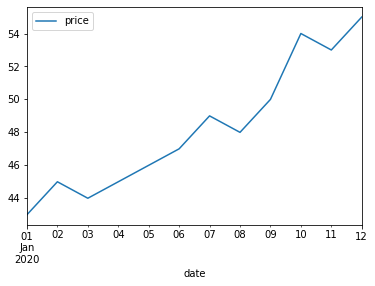

In [2]:
df.set_index('date').plot()

In [3]:
df.loc[2:3, 'price'] = np.nan
df.loc[6, 'price'] = np.nan
df.loc[9, 'price'] = np.nan
df

,date,price
0,2020-01-01,43.0
1,2020-01-02,45.0
2,2020-01-03,NaN
3,2020-01-04,NaN
4,2020-01-05,46.0
5,2020-01-06,47.0
6,2020-01-07,NaN
7,2020-01-08,48.0
8,2020-01-09,50.0
9,2020-01-10,NaN


<AxesSubplot:xlabel='date'>

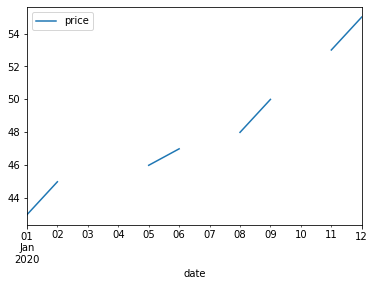

In [4]:
df.set_index('date').plot()

#### Dropping axis labels with missing data: dropna

In [5]:
df.isnull()

,date,price
0,False,False
1,False,False
2,False,True
3,False,True
4,False,False
5,False,False
6,False,True
7,False,False
8,False,False
9,False,True


In [6]:
df.isnull().mean()

date     0.000000
price    0.333333
dtype: float64

In [7]:
4/12

0.3333333333333333

In [8]:
df.isnull().mean() < 0.3

date      True
price    False
dtype: bool

In [9]:
threshold = 0.7 # try 0.3
#Dropping columns with missing value rate higher than threshold
df[df.columns[df.isnull().mean() < threshold]]

,date,price
0,2020-01-01,43.0
1,2020-01-02,45.0
2,2020-01-03,NaN
3,2020-01-04,NaN
4,2020-01-05,46.0
5,2020-01-06,47.0
6,2020-01-07,NaN
7,2020-01-08,48.0
8,2020-01-09,50.0
9,2020-01-10,NaN


In [10]:
threshold=0.4
#Dropping rows with missing value rate higher than threshold
df.loc[df.isnull().mean(axis=1) < threshold]

,date,price
0,2020-01-01,43.0
1,2020-01-02,45.0
4,2020-01-05,46.0
5,2020-01-06,47.0
7,2020-01-08,48.0
8,2020-01-09,50.0
10,2020-01-11,53.0
11,2020-01-12,55.0


#### It is not a good idea to drop them. In this example you make gaps in the dates

<font color='red'>Note: Timeseries plotting can handle the date gaps correctly, so the curve itself doesn't have breaks.</font>

         date  price
0  2020-01-01   43.0
1  2020-01-02   45.0
4  2020-01-05   46.0
5  2020-01-06   47.0
7  2020-01-08   48.0
8  2020-01-09   50.0
10 2020-01-11   53.0
11 2020-01-12   55.0


<AxesSubplot:xlabel='date'>

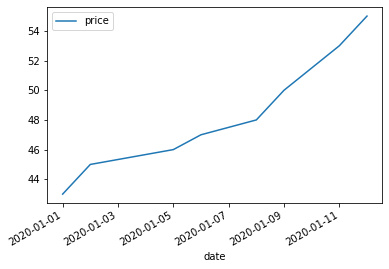

In [11]:
print(df.dropna(axis=0))
df.dropna(axis=0).set_index('date').plot()

#### A better idea is to impute the missing data. A simple algorithm for the time series data is fill gaps forward or backward

         date  price
0  2020-01-01   43.0
1  2020-01-02   45.0
2  2020-01-03   45.0
3  2020-01-04   45.0
4  2020-01-05   46.0
5  2020-01-06   47.0
6  2020-01-07   47.0
7  2020-01-08   48.0
8  2020-01-09   50.0
9  2020-01-10   50.0
10 2020-01-11   53.0
11 2020-01-12   55.0


<AxesSubplot:xlabel='date'>

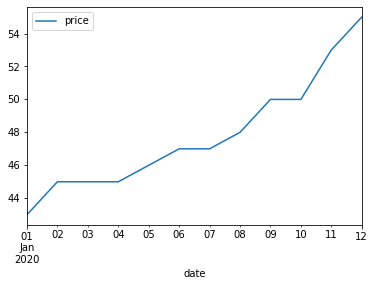

In [12]:
print(df.fillna(method='pad'))
df.fillna(method='pad').set_index('date').plot()

#### Or Linear interpolation at missing data points

<AxesSubplot:xlabel='date'>

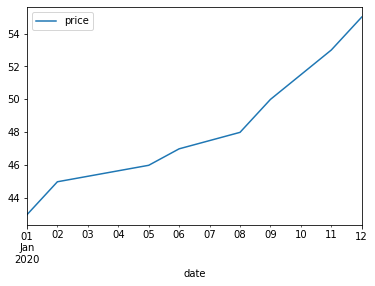

In [13]:
df.set_index('date').interpolate().plot()

In [14]:
df

,date,price
0,2020-01-01,43.0
1,2020-01-02,45.0
2,2020-01-03,NaN
3,2020-01-04,NaN
4,2020-01-05,46.0
5,2020-01-06,47.0
6,2020-01-07,NaN
7,2020-01-08,48.0
8,2020-01-09,50.0
9,2020-01-10,NaN


In [15]:
df.set_index('date').interpolate()

,price
date,
2020-01-01,43.000000
2020-01-02,45.000000
2020-01-03,45.333333
2020-01-04,45.666667
2020-01-05,46.000000
2020-01-06,47.000000
2020-01-07,47.500000
2020-01-08,48.000000
2020-01-09,50.000000


#### There are many other imputation algorithms

https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

* The most common imputation is to use the medians or means or modes of the columns or simply fill with 0. 
* But do they work in our example above?

<AxesSubplot:xlabel='date'>

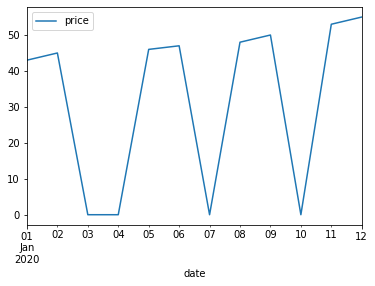

In [16]:
df.fillna(0).set_index('date').plot()

         date   price
0  2020-01-01  43.000
1  2020-01-02  45.000
2  2020-01-03  48.375
3  2020-01-04  48.375
4  2020-01-05  46.000
5  2020-01-06  47.000
6  2020-01-07  48.375
7  2020-01-08  48.000
8  2020-01-09  50.000
9  2020-01-10  48.375
10 2020-01-11  53.000
11 2020-01-12  55.000


<ipython-input-17-fbc3bacc8526>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(df.fillna(df.mean()))
<ipython-input-17-fbc3bacc8526>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean()).set_index('date').plot()


<AxesSubplot:xlabel='date'>

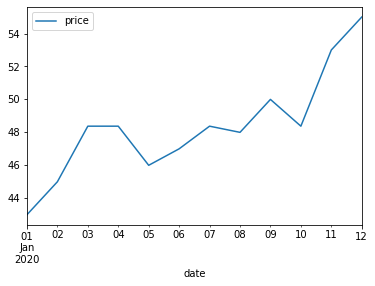

In [17]:
print(df.fillna(df.mean()))
df.fillna(df.mean()).set_index('date').plot()

### 2. Handling Outliers

* An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. 
* In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. 
* Before abnormal observations can be singled out, it is necessary to characterize normal observations.


* Some machine algorithms are very sensitive to outliers
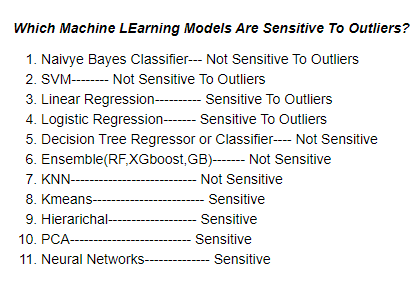


#### Where do outliers come from?

* The outliers can be a result of a mistake during the entire journey of the data from data creation, collection, processing and storing.
* Or it can be just an indication of variance in your data

#### For example,

A trader put a trade with a missing decimal point on the price. The trade will be a very high price above the normal market price.

Or,

Bloomberg records the wrong market data by putting 999 as price.

Or,

One of our students is 100 years old. Not entirely impossible.

#### How to detect outliers?

* Visualization
* z-score
* Moving average
* Ratio with neighbors
* etc

In [18]:
df = pd.DataFrame({'date': pd.date_range(start='2020-01-01', periods=12, freq='D'), 
                   'price': [43,45,44,45,46,47,90,48,50,54,53,55]})
print(df)

         date  price
0  2020-01-01     43
1  2020-01-02     45
2  2020-01-03     44
3  2020-01-04     45
4  2020-01-05     46
5  2020-01-06     47
6  2020-01-07     90
7  2020-01-08     48
8  2020-01-09     50
9  2020-01-10     54
10 2020-01-11     53
11 2020-01-12     55


#### Boxplot

* median (Q2/50th Percentile): the middle value of the dataset.
* first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
* third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
* interquartile range (IQR): 25th to the 75th percentile.
* whiskers (shown in blue)
* outliers (shown as green circles)
* "maximum": Q3 + 1.5*IQR
* "minimum": Q1 -1.5*IQR

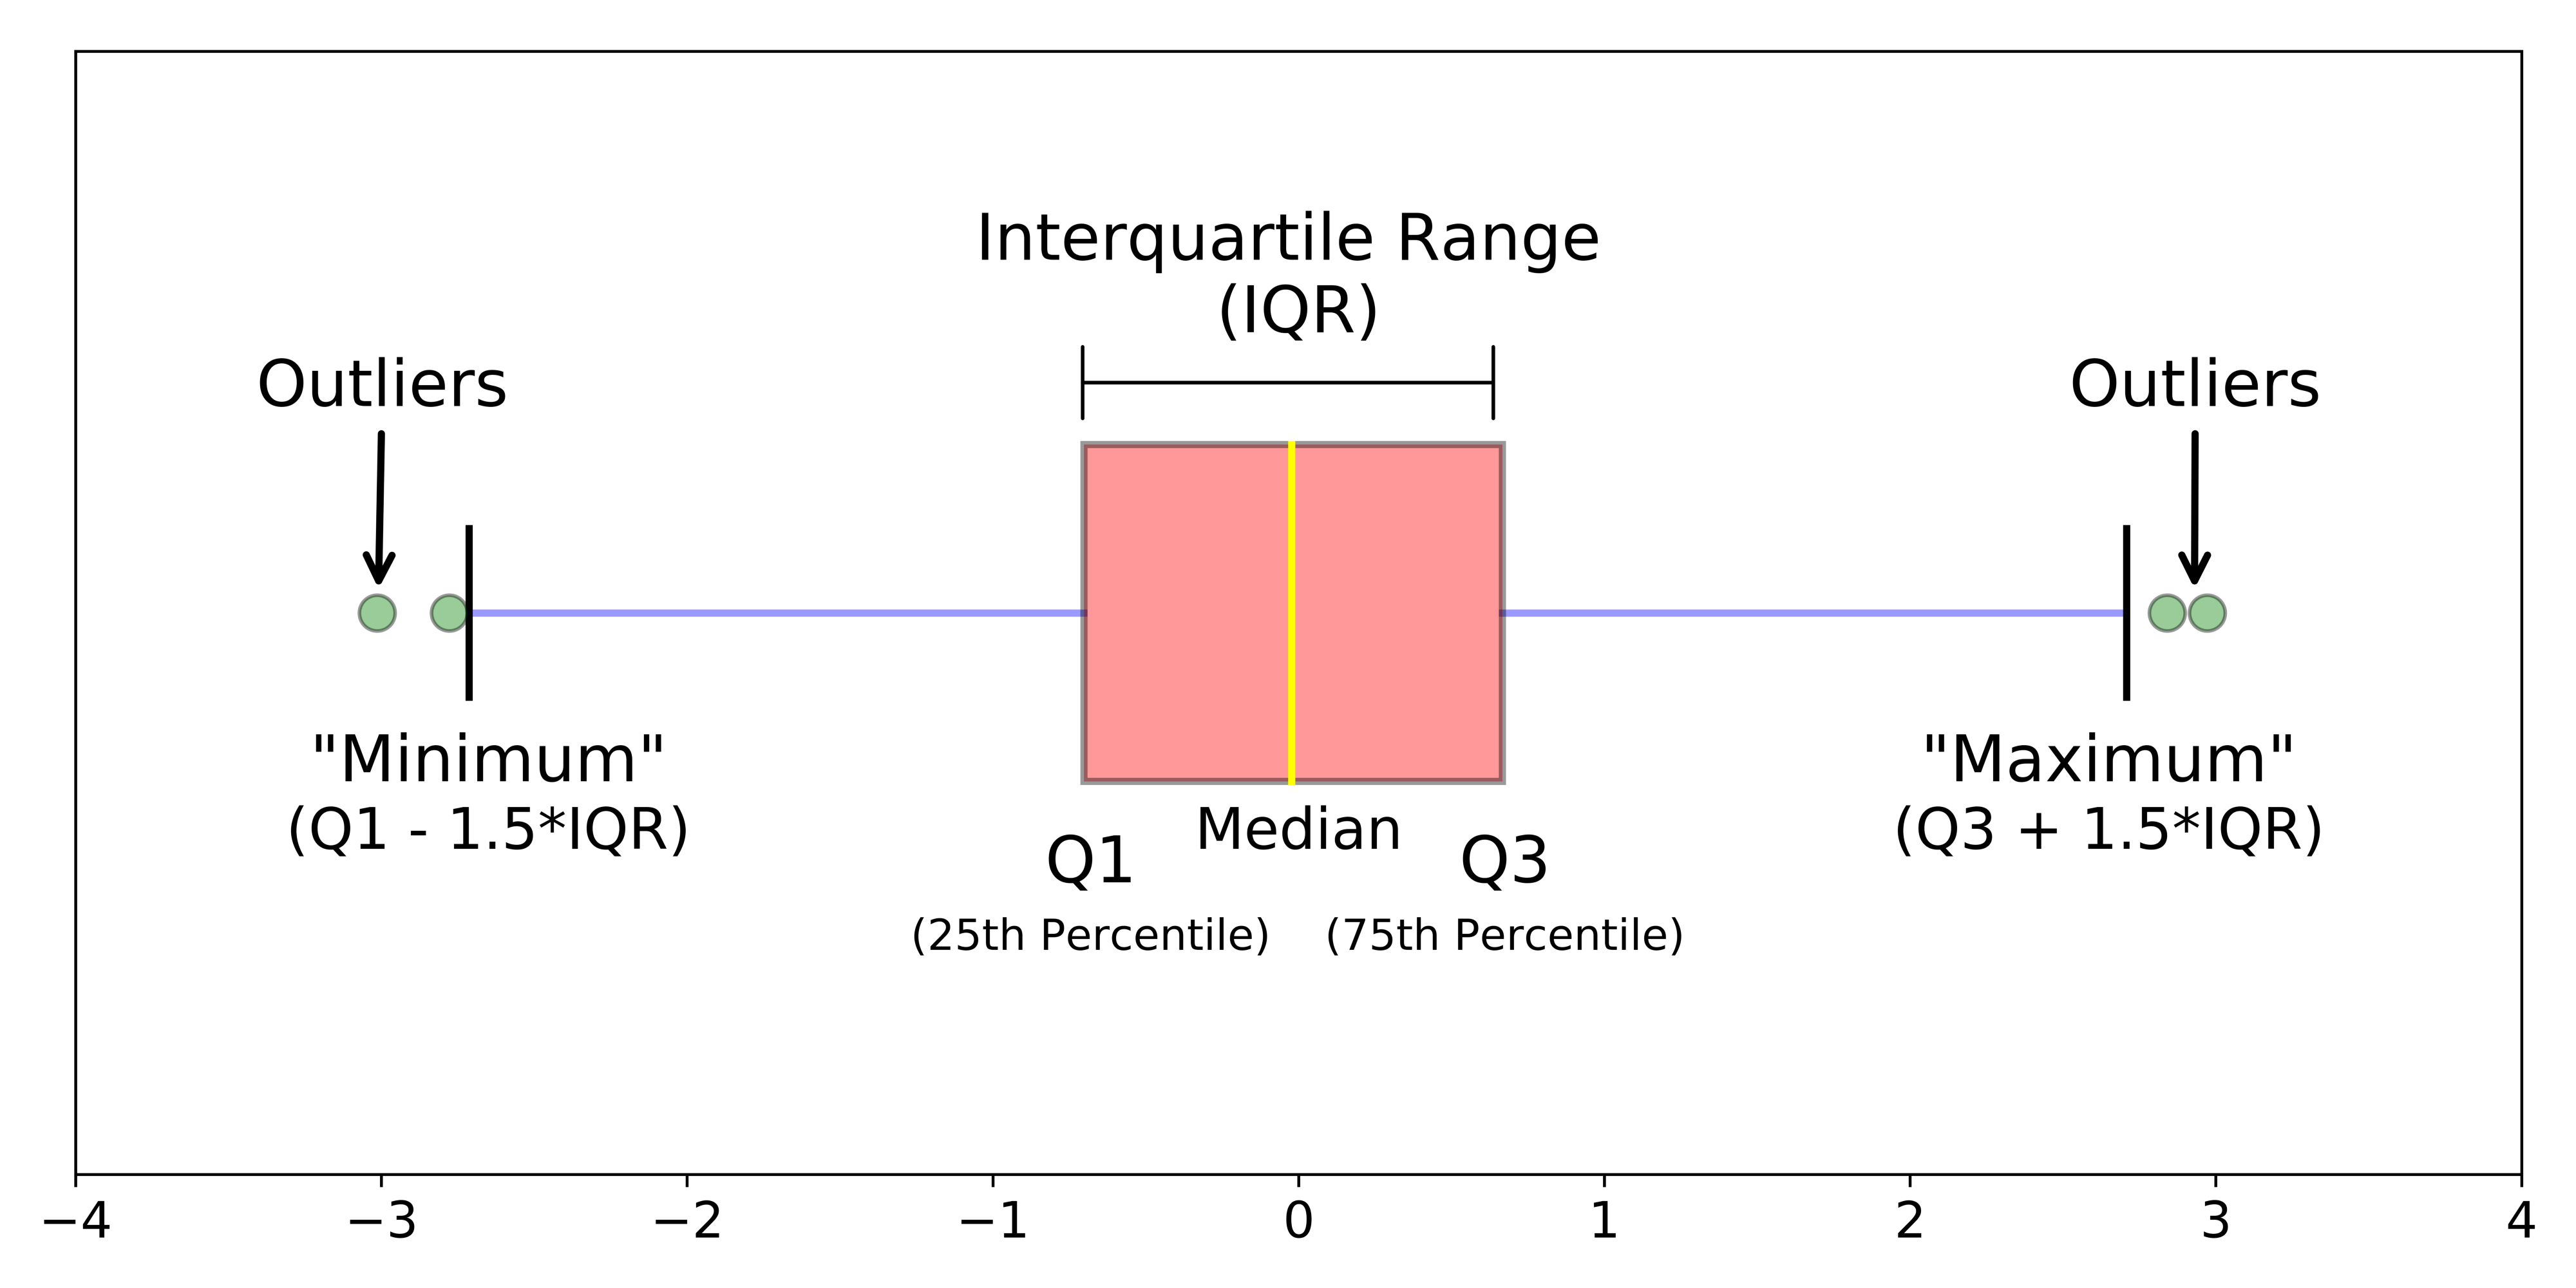

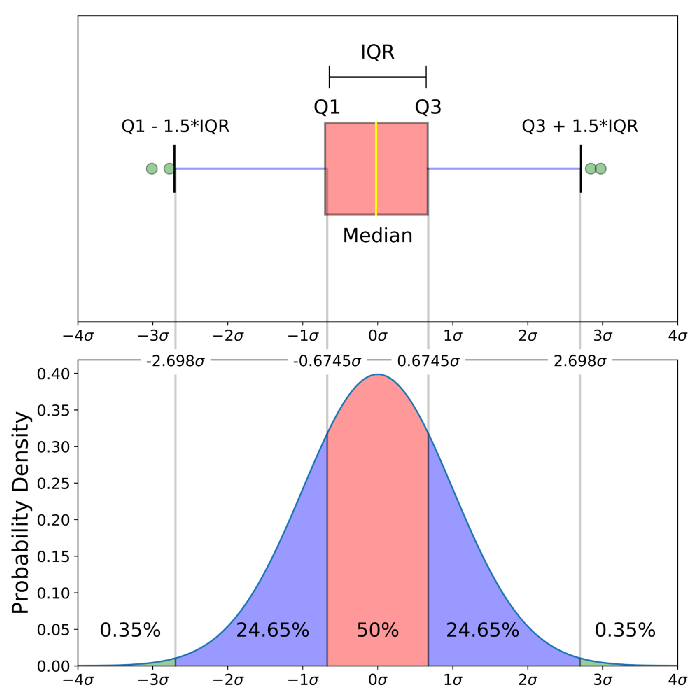

<AxesSubplot:xlabel='price'>

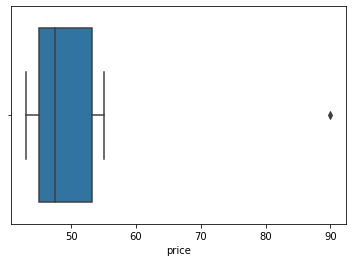

In [19]:
import seaborn as sns
sns.boxplot(x=df['price'])

#### Dropping the outlier rows with Percentiles

In [20]:
upper_lim = df['price'].quantile(.95)
lower_lim = df['price'].quantile(.05) # Top 5% means here the values that are out of the 95th percentile of data

df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]

,date,price
1,2020-01-02,45
2,2020-01-03,44
3,2020-01-04,45
4,2020-01-05,46
5,2020-01-06,47
7,2020-01-08,48
8,2020-01-09,50
9,2020-01-10,54
10,2020-01-11,53
11,2020-01-12,55


In [21]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

45.0 53.25 8.25


In [22]:
df[(df['price'] < (Q3 + 1.5 * IQR)) & (df['price'] > (Q1 - 1.5 * IQR))]

,date,price
0,2020-01-01,43
1,2020-01-02,45
2,2020-01-03,44
3,2020-01-04,45
4,2020-01-05,46
5,2020-01-06,47
7,2020-01-08,48
8,2020-01-09,50
9,2020-01-10,54
10,2020-01-11,53


#### Z-score

If the population mean and population standard deviation are known, a raw score x is converted into a standard score by

$\Large z={x-\mu \over \sigma }$

where:

μ is the mean of the population.

σ is the standard deviation of the population.

In [23]:
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame({'date': pd.date_range(start='2020-01-01', periods=12, freq='D'), 
                   'price': [43,45,44,45,46,47,90,48,50,54,53,55]})
print(df)
df['zscore']=StandardScaler().fit_transform(df.loc[: ,['price']].values)
df

         date  price
0  2020-01-01     43
1  2020-01-02     45
2  2020-01-03     44
3  2020-01-04     45
4  2020-01-05     46
5  2020-01-06     47
6  2020-01-07     90
7  2020-01-08     48
8  2020-01-09     50
9  2020-01-10     54
10 2020-01-11     53
11 2020-01-12     55


,date,price,zscore
0,2020-01-01,43,-0.711461
1,2020-01-02,45,-0.547278
2,2020-01-03,44,-0.629370
3,2020-01-04,45,-0.547278
4,2020-01-05,46,-0.465186
5,2020-01-06,47,-0.383095
6,2020-01-07,90,3.146849
7,2020-01-08,48,-0.301003
8,2020-01-09,50,-0.136820
9,2020-01-10,54,0.191547


#### it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

* Here we filter 
```
2020-01-07	90	3.146849
```

In [24]:
threshold = 3
df[df['zscore']<=threshold]

,date,price,zscore
0,2020-01-01,43,-0.711461
1,2020-01-02,45,-0.547278
2,2020-01-03,44,-0.629370
3,2020-01-04,45,-0.547278
4,2020-01-05,46,-0.465186
5,2020-01-06,47,-0.383095
7,2020-01-08,48,-0.301003
8,2020-01-09,50,-0.136820
9,2020-01-10,54,0.191547
10,2020-01-11,53,0.109456


#### Keep in mind, before you discard them, outliers may contain important information	

* Outliers should be investigated carefully. 
* Often they contain valuable information about the process under investigation or the data gathering and recording process. 
* Before considering the possible elimination of these points from the data, one should try to understand why they appeared and whether it is likely similar values will continue to appear. 
* Of course, outliers are often bad data points.

### 3. Handling noisy data

* Time series data usually has some noise on top of the real signal
* You want to get a reasonably clean signal out of that. 
* Intuition tells us the easiest way to get out of this situation is to smooth out the noise in some way

#### There are many techniques to filter the noise

* Moving average
    - Simple Moving Average (SMA): takes the average over some set number of time periods. So a 10 period SMA would be over 10 periods (usually meaning 10 trading days).
    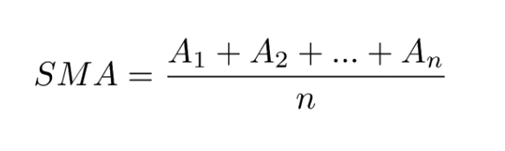
    - Exponential Moving Average (EMA)
    


* Filtering
    - Savitzky–Golay filter: fitting successive sub-sets of adjacent data points with a low-degree polynomial by the method of linear least squares
<img src="https://tinyurl.com/y386fzf7" width="750" align="center">

<AxesSubplot:>

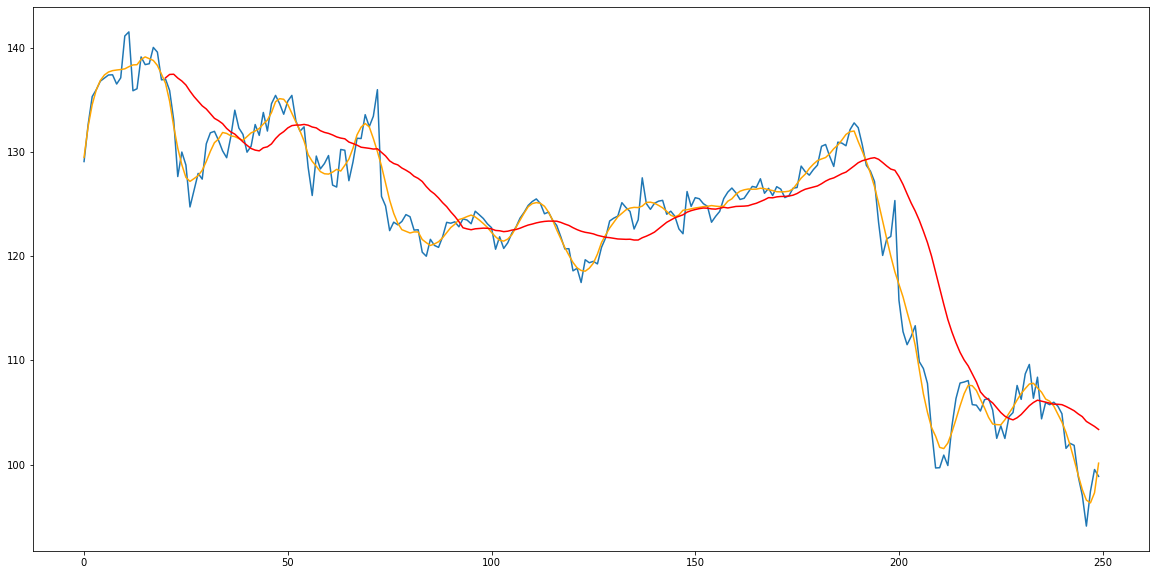

In [25]:
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import math
import statsmodels.formula.api as sm
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]
IBM= pd.read_csv("IBM.csv") 
IBM

IBM['Close_SG']=savgol_filter(IBM['Adj Close'], 21, 5)
IBM['Close_SMA']=IBM['Adj Close'].rolling(window=21).mean()

ax=IBM['Adj Close'].plot()
IBM.Close_SG.plot(ax=ax, color='orange')
IBM.Close_SMA.plot(ax=ax, color='red')

### 4. Binning

* Binning can be applied on both categorical and numerical data.
* The main motivation of binning is to make the model more robust and prevent overfitting. 
* However, it has a cost on the performance. Every time you bin something, you sacrifice information and make your data more regularized.

#### Binning numerical data

* <u>Equal Width Binning</u>

    This algorithm divides the continuous variable into several categories having bins or range of the same width.
    
    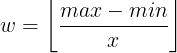

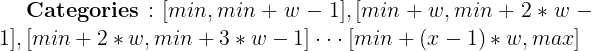

where

    x = number of categories
    w = width of a category
    max, min = Maximum and Minimun of the list
    
#### Example

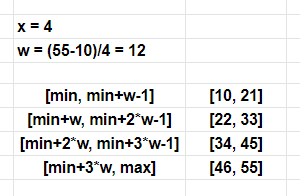

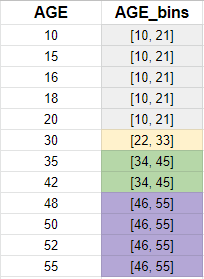

* <u>Equal frequency binning</u>


    - This algorithm divides the data into various categories having approximately the same number of values. 
    - The values of data are distributed equally into the formed categories.
    
    
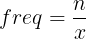

where 

    x = number of categories
    freq = frequency of a category
    n = number of values in data
    
#### Example

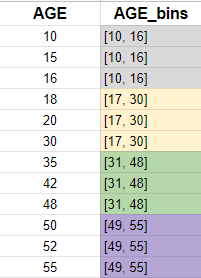

#### Bar plot for equal width and equal frequency binning

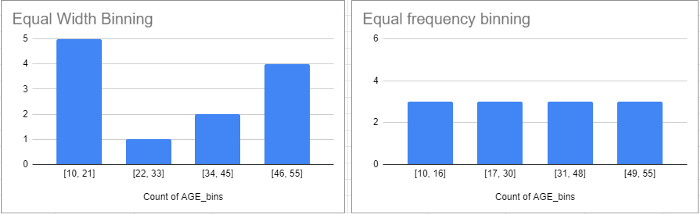

In [26]:
ages = pd.DataFrame({'age': np.random.randint(21, 51, 8)})
ages

,age
0,27
1,33
2,39
3,34
4,23
5,46
6,24
7,27


* Create New Column of age_bins Via Defining Bin Edges
* This code creates a new column called age_bins that sets the x argument to the age column in ages and sets the bins argument to a list of bin edge values. 
* The left bin edge will be exclusive and the right bin edge will be inclusive.

* The bins will be for ages: (20, 29] (someone in their 20s), (30, 39], and (40, 49].

In [27]:
ages['age_bins'] = pd.cut(x=ages['age'], bins=[20, 29, 39, 49])
ages

,age,age_bins
0,27,"(20, 29]"
1,33,"(29, 39]"
2,39,"(29, 39]"
3,34,"(29, 39]"
4,23,"(20, 29]"
5,46,"(39, 49]"
6,24,"(20, 29]"
7,27,"(20, 29]"


* verify the unique age_bins values

In [28]:
ages['age_bins'].unique()

[(20, 29], (29, 39], (39, 49]]
Categories (3, interval[int64]): [(20, 29] < (29, 39] < (39, 49]]

* Create New Column of of age_by_decade With Labels 20s, 30s, and 40s
* This code creates a new column called age_by_decade with the same first 2 arguments as above, and a third argument of labels set to a list of values that correspond to how the age values will be put in bins by decades.

In [29]:
ages['age_by_decade'] = pd.cut(x=ages['age'], bins=[20, 29, 39, 49], labels=['20s', '30s', '40s'])
ages

,age,age_bins,age_by_decade
0,27,"(20, 29]",20s
1,33,"(29, 39]",30s
2,39,"(29, 39]",30s
3,34,"(29, 39]",30s
4,23,"(20, 29]",20s
5,46,"(39, 49]",40s
6,24,"(20, 29]",20s
7,27,"(20, 29]",20s


#### Binning categorical data

Example

    Value      Bin       
    Spain  ->  Europe      
    Italy  ->  Europe       
    Chile  ->  South America
    Brazil ->  South America

In [30]:
data=pd.DataFrame({'Country':['Spain', 'Chile', 'Australia', 'Italy', 'Brazil']})
data

,Country
0,Spain
1,Chile
2,Australia
3,Italy
4,Brazil


In [31]:
choices = [
    (data['Country'].str.contains('Spain'), 'Europe'),
    (data['Country'].str.contains('Italy'), 'Europe'),
    (data['Country'].str.contains('Chile'), 'South America'),
    (data['Country'].str.contains('Brazil'), 'South America')
]

data['Continent'] = np.select(*zip(*choices), default='Other')
data

,Country,Continent
0,Spain,Europe
1,Chile,South America
2,Australia,Other
3,Italy,Europe
4,Brazil,South America


### 5. Log Transform
$log(x+1)$

* log transform squashes or compresses range of large numbers and expands the range of small numbers. 
* So if x is larger, then slower the log(x) increments.

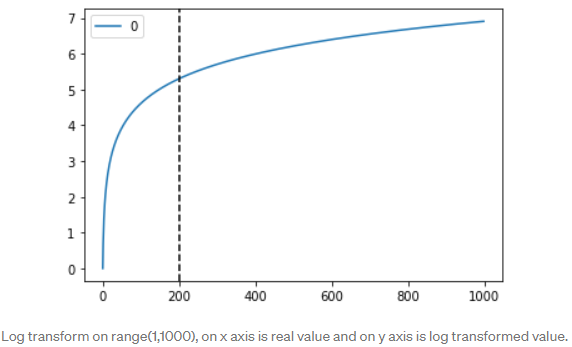

* log transform is one of the most commonly used mathematical transformations in feature engineering. Here are the benefits of using log transform:

    - Variance stabilizing. It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal
    
    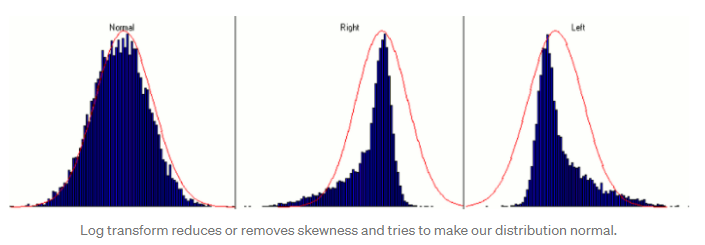
    
    - It also decreases the effect of the outliers due to the normalization of magnitude differences and the model become more robust because log transform reduces the range of values caused by outliers.
    - The data you apply log transform to <b>must have only positive values</b>, otherwise you receive an error

In [32]:
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data

,value
0,2
1,45
2,-23
3,85
4,28
5,2
6,35
7,-12


In [33]:
data['log(x+1)'] = (data['value']+1).transform(np.log)
data

,value,log(x+1)
0,2,1.098612
1,45,3.828641
2,-23,NaN
3,85,4.454347
4,28,3.367296
5,2,1.098612
6,35,3.583519
7,-12,NaN


#### Negative Values Handling
$log(x-min(x)+1)$

In [34]:
data['log(x-min(x)+1)'] = (data['value']-data['value'].min()+1) .transform(np.log)
data

,value,log(x+1),log(x-min(x)+1)
0,2,1.098612,3.258097
1,45,3.828641,4.234107
2,-23,NaN,0.000000
3,85,4.454347,4.691348
4,28,3.367296,3.951244
5,2,1.098612,3.258097
6,35,3.583519,4.077537
7,-12,NaN,2.484907


### 6. One-Hot Encoding

* <b>The main idea behind this method is to changes categorical data to numerical data so that the data is easier for algorithm</b>
* One-hot encoding doesn't lose information. 
* This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them. 
* These binary values express the relationship between grouped and encoded column.


#### Example: One Hot encoding Applied to Color column
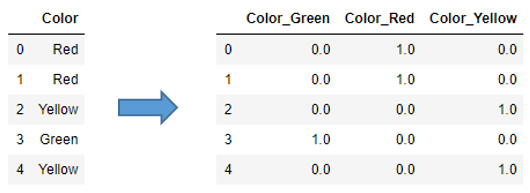

In [35]:
color=pd.DataFrame({'Color': ['Red', 'Red', 'Yellow', 'Green', 'Yellow']})
color

,Color
0,Red
1,Red
2,Yellow
3,Green
4,Yellow


In [36]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(color)
X_ohe = ohe.transform(color).toarray()
X_ohe

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [37]:
ohe_df = pd.DataFrame(X_ohe, columns=ohe.get_feature_names(color.columns))
ohe_df

,Color_Green,Color_Red,Color_Yellow
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


### 7. Aggregations / Group Statistics

* Create statistical features in a subgroup. These features may help ML algorithms a lot.
* For example, we want to create a new feature "salary_level" that indicates each person's salary level in the degree subgroup.

In [38]:
salary=pd.DataFrame({'Name': ['David', 'Joe', 'Tom', 'Chris', 'Bob', 'Ed'], 
                     'Degree': ['BS', 'MS', 'BS', 'MS', 'MS', 'BS'], 
                     'Salary': [100, 120, 130, 140, 110, 90]})
salary

,Name,Degree,Salary
0,David,BS,100
1,Joe,MS,120
2,Tom,BS,130
3,Chris,MS,140
4,Bob,MS,110
5,Ed,BS,90


In [39]:
degree_mean=salary.groupby('Degree').mean().rename(columns={'Salary':'Salary_mean_by_degree'})
degree_mean

,Salary_mean_by_degree
Degree,
BS,106.666667
MS,123.333333


In [40]:
degree_std=salary.groupby('Degree').std().rename(columns={'Salary':'Salary_std_by_degree'})
degree_std

,Salary_std_by_degree
Degree,
BS,20.816660
MS,15.275252


In [41]:
salary=pd.merge(pd.merge(salary, degree_mean, on='Degree'), degree_std, on='Degree')
salary

,Name,Degree,Salary,Salary_mean_by_degree,Salary_std_by_degree
0,David,BS,100,106.666667,20.816660
1,Tom,BS,130,106.666667,20.816660
2,Ed,BS,90,106.666667,20.816660
3,Joe,MS,120,123.333333,15.275252
4,Chris,MS,140,123.333333,15.275252
5,Bob,MS,110,123.333333,15.275252


In [42]:
salary['Salary_level']=(salary['Salary']-salary['Salary_mean_by_degree'])/salary['Salary_std_by_degree']
salary

,Name,Degree,Salary,Salary_mean_by_degree,Salary_std_by_degree,Salary_level
0,David,BS,100,106.666667,20.816660,-0.320256
1,Tom,BS,130,106.666667,20.816660,1.120897
2,Ed,BS,90,106.666667,20.816660,-0.800641
3,Joe,MS,120,123.333333,15.275252,-0.218218
4,Chris,MS,140,123.333333,15.275252,1.091089
5,Bob,MS,110,123.333333,15.275252,-0.872872


#### The above result shows that Tom is doing better in his subgroup than Chris, though Tom's salary is lower than Chris's.

### 8. Combining / Splitting

* Sometime string variable contain multiple information in one variable. 
* For example Newark, NJ 07102. You will need to split it with a regex or using a split method to get the city, the state, and the zip code

In [43]:
schools=pd.DataFrame({'school': ['NJIT', 'Stevens'], 
                      'Address': ['Newark, NJ 07102', 'Hoboken, NJ 07030']})
schools

,school,Address
0,NJIT,"Newark, NJ 07102"
1,Stevens,"Hoboken, NJ 07030"


In [44]:
schools[['City', 'State', 'Zip']] = schools['Address'].str.split(',?\s+', expand=True)
schools

,school,Address,City,State,Zip
0,NJIT,"Newark, NJ 07102",Newark,NJ,07102
1,Stevens,"Hoboken, NJ 07030",Hoboken,NJ,07030


### 9. Scaling

* Normalization
    - Normalization (or min-max normalization) scales all values in a fixed range between 0 and 1. This transformation does not change the distribution of the feature and due to the decreased standard deviations, the effects of the outliers increases. Therefore, before normalization, it is recommended to handle the outliers
    
    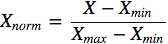
    
    
* Standardization (see 2. Handling Outliers)
    - Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

In [45]:
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())
data

,value,normalized
0,2,0.231481
1,45,0.629630
2,-23,0.000000
3,85,1.000000
4,28,0.472222
5,2,0.231481
6,35,0.537037
7,-12,0.101852


In [46]:
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()
data

,value,standardized
0,2,-0.518878
1,45,0.703684
2,-23,-1.229670
3,85,1.840952
4,28,0.220346
5,2,-0.518878
6,35,0.419367
7,-12,-0.916922


### 10. Extracting Date

* Extracting the parts of the date into different columns: Year, month, day, etc.
* Extracting the time period between the current date and columns in terms of years, months, days, etc.
* Extracting some specific features from the date: Name of the weekday, Weekend or not, holiday or not, etc.

In [47]:
IBM

,Date,Open,High,Low,Close,Adj Close,Volume,Close_SG,Close_SMA
0,2018-01-02,154.500000,154.809998,153.539993,154.250000,129.093903,4202500,129.492733,NaN
1,2018-01-03,157.339996,159.809998,156.330002,158.490005,132.642441,9441600,132.461357,NaN
2,2018-01-04,159.649994,162.320007,159.369995,161.699997,135.328934,7556200,134.557287,NaN
3,2018-01-05,162.440002,162.899994,161.100006,162.490005,135.990097,5195800,135.972597,NaN
4,2018-01-08,162.660004,163.910004,161.699997,163.470001,136.810242,5237500,136.874561,NaN
...,...,...,...,...,...,...,...,...,...
245,2018-12-21,112.500000,115.279999,110.440002,110.940002,97.046852,10386500,97.606790,104.606109
246,2018-12-24,109.900002,111.000000,107.500000,107.570000,94.098885,3821400,96.593881,104.147897
247,2018-12-26,108.000000,111.389999,105.940002,111.389999,97.440498,6645800,96.326892,103.906293
248,2018-12-27,109.989998,113.779999,109.470001,113.779999,99.531197,6045600,97.299943,103.665523


In [48]:
IBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
 7   Close_SG   250 non-null    float64
 8   Close_SMA  230 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 17.7+ KB


In [49]:
#Transform string to date
IBM['Date'] = pd.to_datetime(IBM.Date, format="%Y-%m-%d")
IBM

,Date,Open,High,Low,Close,Adj Close,Volume,Close_SG,Close_SMA
0,2018-01-02,154.500000,154.809998,153.539993,154.250000,129.093903,4202500,129.492733,NaN
1,2018-01-03,157.339996,159.809998,156.330002,158.490005,132.642441,9441600,132.461357,NaN
2,2018-01-04,159.649994,162.320007,159.369995,161.699997,135.328934,7556200,134.557287,NaN
3,2018-01-05,162.440002,162.899994,161.100006,162.490005,135.990097,5195800,135.972597,NaN
4,2018-01-08,162.660004,163.910004,161.699997,163.470001,136.810242,5237500,136.874561,NaN
...,...,...,...,...,...,...,...,...,...
245,2018-12-21,112.500000,115.279999,110.440002,110.940002,97.046852,10386500,97.606790,104.606109
246,2018-12-24,109.900002,111.000000,107.500000,107.570000,94.098885,3821400,96.593881,104.147897
247,2018-12-26,108.000000,111.389999,105.940002,111.389999,97.440498,6645800,96.326892,103.906293
248,2018-12-27,109.989998,113.779999,109.470001,113.779999,99.531197,6045600,97.299943,103.665523


In [50]:
IBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    int64         
 7   Close_SG   250 non-null    float64       
 8   Close_SMA  230 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 17.7 KB


In [51]:
from datetime import date

#Extracting Month
IBM['month'] = IBM['Date'].dt.month

#Extracting passed years since the date
IBM['passed_years'] = date.today().year - IBM['Date'].dt.year

IBM

,Date,Open,High,Low,Close,Adj Close,Volume,Close_SG,Close_SMA,month,passed_years
0,2018-01-02,154.500000,154.809998,153.539993,154.250000,129.093903,4202500,129.492733,NaN,1,3
1,2018-01-03,157.339996,159.809998,156.330002,158.490005,132.642441,9441600,132.461357,NaN,1,3
2,2018-01-04,159.649994,162.320007,159.369995,161.699997,135.328934,7556200,134.557287,NaN,1,3
3,2018-01-05,162.440002,162.899994,161.100006,162.490005,135.990097,5195800,135.972597,NaN,1,3
4,2018-01-08,162.660004,163.910004,161.699997,163.470001,136.810242,5237500,136.874561,NaN,1,3
...,...,...,...,...,...,...,...,...,...,...,...
245,2018-12-21,112.500000,115.279999,110.440002,110.940002,97.046852,10386500,97.606790,104.606109,12,3
246,2018-12-24,109.900002,111.000000,107.500000,107.570000,94.098885,3821400,96.593881,104.147897,12,3
247,2018-12-26,108.000000,111.389999,105.940002,111.389999,97.440498,6645800,96.326892,103.906293,12,3
248,2018-12-27,109.989998,113.779999,109.470001,113.779999,99.531197,6045600,97.299943,103.665523,12,3


Reference:

https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d

https://tcoil.info/savitzky-golay-filter-for-stocks-and-time-series-savgol-fit/

https://tmramalho.github.io/blog/2013/04/05/an-introduction-to-smoothing-time-series-in-python-part-i-filtering-theory/

https://towardsdatascience.com/time-series-smoothing-for-better-forecasting-7fbf10428b2

https://towardsdatascience.com/feature-engineering-deep-dive-into-encoding-and-binning-techniques-5618d55a6b38

https://dfrieds.com/data-analysis/bin-values-python-pandas.html

https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b

https://medium.com/analytics-vidhya/log-transform-for-positivity-d3e1f183c804